In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings

warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
df = pd.read_csv("input/GamingCompanies-Main.csv")

df

,Name,marketcap,earnings,employeeCount,OperatingMargin,PERatio,Revenue,country
0,11 bit studios,2.600171e+08,8147710,192,4583.070,40.888100,1.777785e+07,Poland
1,Activision Blizzard,5.835960e+10,2972000000,9500,3582.020,23.471700,8.297000e+09,United States
2,Appirits,3.008261e+07,1591300,411,372.253,31.000000,4.274776e+07,Japan
3,Aristocrat,1.551363e+10,778411000,7000,2266.820,14.297000,3.433941e+09,Australia
4,ATARI,4.923000e+07,-13476800,26,-6296.300,-3.000000,2.140430e+07,France
...,...,...,...,...,...,...,...,...
74,Unity Software,9.993398e+09,-590918000,4934,-4941.280,-16.076200,1.195880e+09,United States
75,Versus Systems,1.169109e+07,-11545800,0,-153192.000,-0.823529,7.536780e+05,Canada
76,Webzen,5.007477e+08,0,0,0.000,0.000000,0.000000e+00,South Korea
77,Wemade,8.686795e+08,0,0,0.000,0.000000,0.000000e+00,South Korea


3. Cleaning rows/companies for which there's no data

In [4]:
df = df[df['earnings'] > 0]

## Number of Gaming Companies (by Country)

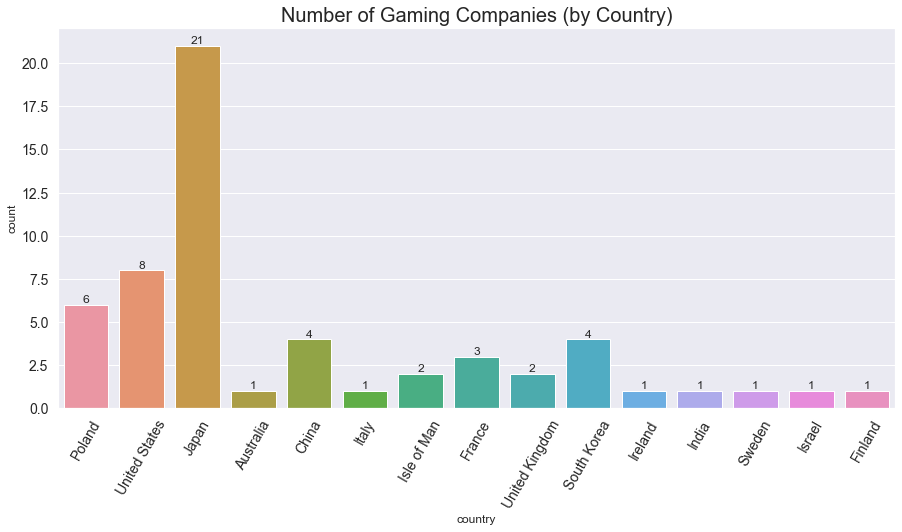

In [61]:
fig = plt.figure(figsize=(15, 7))
plt.title('Number of Gaming Companies (by Country)', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(rotation=60)

ax = sns.countplot(x='country', data=df)

for i in ax.containers:
    ax.bar_label(i,)

## Number of Employees in Game Industry (by Country) 

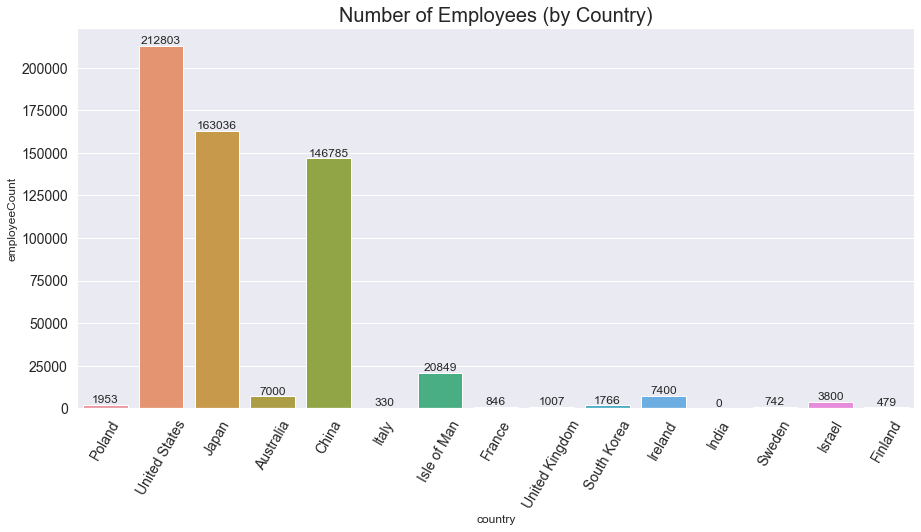

In [56]:
fig = plt.figure(figsize=(15, 7))
plt.title('Number of Employees (by Country)', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(rotation=60)

ax = sns.barplot(x='country', y='employeeCount', data=df, ci=None, estimator=np.sum)

for i in ax.containers:
    ax.bar_label(i,)

In [8]:
fig = px.scatter(df,
               x="Revenue",
               y="earnings",
               size="employeeCount", 
               color="country",
               width=1000,
               height=600,
               hover_name="Name", 
               log_x=True, 
               log_y=True,
               size_max=60,
               title="log-log correlation Between Earnings and Revenue")

fig.show()